<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/CustomerSegmentationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

In [24]:
df=pd.read_csv('Mall_Customers.csv')

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

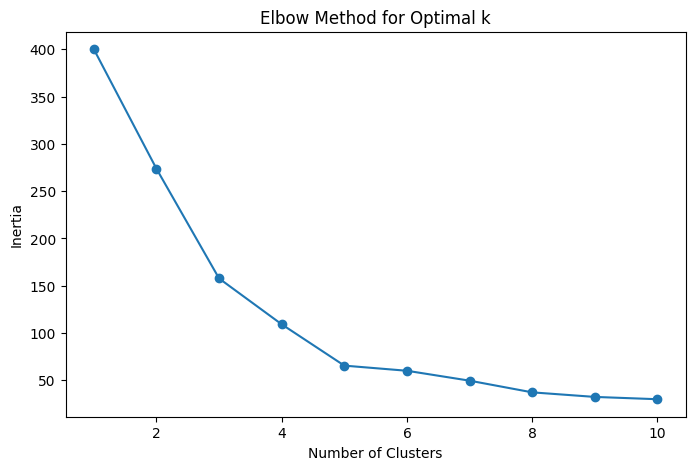

In [28]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

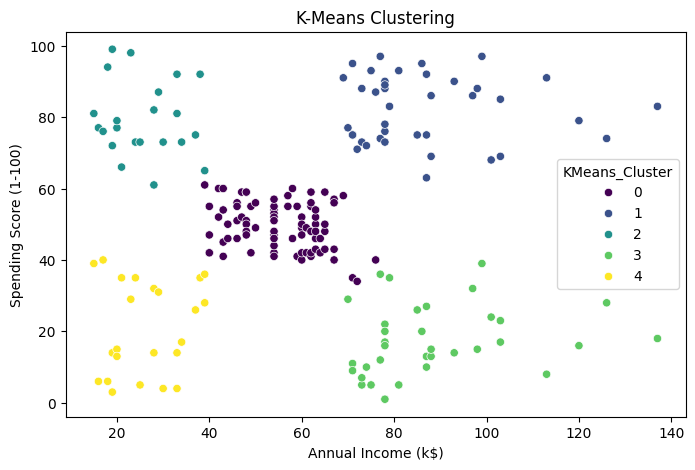

In [29]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

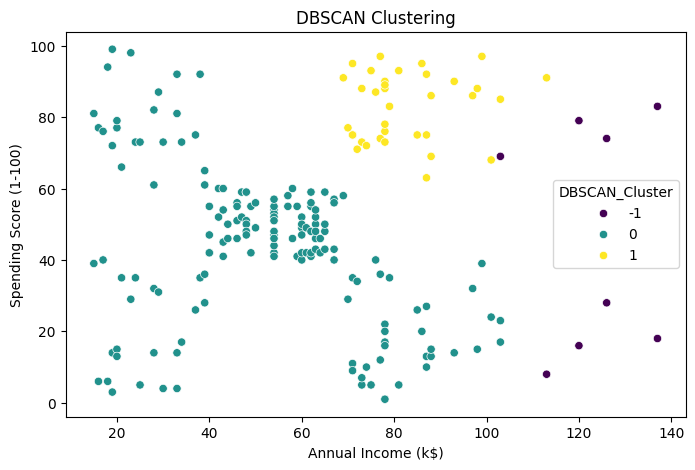

In [30]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(X, df['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.4f}')

# Evaluating DBSCAN if it has more than 1 cluster
if len(set(dbscan.labels_)) > 1:
    silhouette_dbscan = silhouette_score(X, df['DBSCAN_Cluster'])
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}')
else:
    print('DBSCAN produced only one cluster or noise, making Silhouette Score not applicable.')

Silhouette Score for K-Means: 0.5547
Silhouette Score for DBSCAN: 0.3504
